In [1]:
import pickle
import graphviz
import collections
import numpy as np
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [2]:
train_path = "./data/sushi3-2016/train.csv"
model_path = "./model.pkl"

df = pd.read_table(train_path,sep=' ',header=None)
df = df.rename(columns={0: 'user_id', 1: 'gender', 2: 'age', 3: 'response_time', 4: 'prefecture_most',
                        5: 'region_most', 6: 'east/west_most', 7: 'prefecture_now', 8: 'east/west_most', 9: 'region_now', 
                        10: 'east/west_now', 11: 'item_id', 12: 'style', 13: 'major_group', 14: 'minor_group',
                        15: 'oiliness', 16: 'frequently_eat', 17: 'normalized_price', 18: 'frequently_sold', 19: 'score'})

train_df,test_df = train_test_split(df)

# # テストデータには，最後のuser_idの人のみを使用．
# train_df = df[0:len(df)-100]
# test_df = df[len(df)-100:len(df)]

In [3]:
# Shotaro Akaho
df[df['user_id'] == 1431]

,user_id,gender,age,response_time,prefecture_most,region_most,east/west_most,prefecture_now,east/west_most,region_now,east/west_now,item_id,style,major_group,minor_group,oiliness,frequently_eat,normalized_price,frequently_sold,score
33450,1431,1,2,250,26,6,1,27,6,1,1,4,1,0,8,0.813043,1.643478,3.287282,0.88,2
33451,1431,1,2,250,26,6,1,27,6,1,1,8,1,0,1,0.551855,2.057532,4.485455,0.80,3
33452,1431,1,2,250,26,6,1,27,6,1,1,12,1,0,4,2.516750,1.327471,3.332449,0.72,1
33453,1431,1,2,250,26,6,1,27,6,1,1,17,1,0,6,2.571850,0.993110,1.856566,0.60,2
33454,1431,1,2,250,26,6,1,27,6,1,1,29,0,1,11,3.730548,1.456772,1.020000,0.40,2
33455,1431,1,2,250,26,6,1,27,6,1,1,37,1,0,1,1.255639,2.075188,2.472944,0.28,1
33456,1431,1,2,250,26,6,1,27,6,1,1,47,1,0,6,2.680328,1.295082,3.415152,0.20,4
33457,1431,1,2,250,26,6,1,27,6,1,1,52,1,0,4,2.498258,0.919861,1.700000,0.16,2
33458,1431,1,2,250,26,6,1,27,6,1,1,53,1,0,1,0.691489,1.751773,2.623106,0.16,4
33459,1431,1,2,250,26,6,1,27,6,1,1,65,1,0,2,3.129032,0.748387,2.333333,0.08,2


In [4]:
df[0:5]

,user_id,gender,age,response_time,prefecture_most,region_most,east/west_most,prefecture_now,east/west_most,region_now,east/west_now,item_id,style,major_group,minor_group,oiliness,frequently_eat,normalized_price,frequently_sold,score
0,6371,0,2,355,0,0,0,0,0,0,0,1,1,0,3,0.926384,1.990228,1.992459,0.88,0
1,6371,0,2,355,0,0,0,0,0,0,0,3,1,0,5,2.688401,2.043240,1.515152,0.92,4
2,6371,0,2,355,0,0,0,0,0,0,0,4,1,0,8,0.813043,1.643478,3.287282,0.88,2
3,6371,0,2,355,0,0,0,0,0,0,0,12,1,0,4,2.516750,1.327471,3.332449,0.72,1
4,6371,0,2,355,0,0,0,0,0,0,0,44,1,0,7,1.812500,1.023810,1.496364,0.20,1


In [5]:
train_df = train_df.sort_values(['user_id']).reset_index(drop=True)
test_df  = test_df.sort_values(['user_id']).reset_index(drop=True)

In [6]:
X_train = train_df.drop(["user_id", "score"], axis=1)
y_train = train_df["score"]
X_test = train_df.drop(["user_id", "score"], axis=1)
y_test = train_df["score"]

In [7]:
# lightGBMの回帰でやるとこうなる

In [8]:
gbm_reg = lgb.LGBMRegressor(objective='regression',
                        num_leaves = 31,
                        n_estimators=100)
gbm_reg.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='l2',
        verbose=0)

# Feature Importances
fti = gbm_reg.feature_importances_

print('Feature Importances:')
label = [str(i) for i in X_train.columns.values]
for i, feat in enumerate(label):
    print('\t{0:20s} : {1:>.6f}'.format(feat, fti[i]))

Feature Importances:
	gender               : 134.000000
	age                  : 219.000000
	response_time        : 684.000000
	prefecture_most      : 341.000000
	region_most          : 33.000000
	east/west_most       : 0.000000
	prefecture_now       : 322.000000
	east/west_most       : 22.000000
	region_now           : 0.000000
	east/west_now        : 71.000000
	item_id              : 198.000000
	style                : 7.000000
	major_group          : 10.000000
	minor_group          : 152.000000
	oiliness             : 265.000000
	frequently_eat       : 273.000000
	normalized_price     : 242.000000
	frequently_sold      : 27.000000


In [9]:
# 重要度をグラフ化

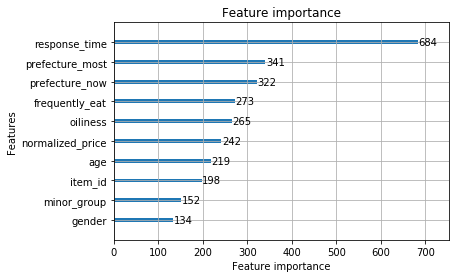

In [29]:
ax = lgb.plot_importance(gbm_reg, max_num_features=10)
plt.savefig('Feature importance.png')

In [28]:
graph = lgb.create_tree_digraph(gbm_reg)
graph.render(view=True)

'Digraph.gv.pdf'